# Predicción de Precios de Viviendas
### Grupo #2

> El objetivo principal de este proyecto es **construir y evaluar un modelo de regresión** que prediga el precio de una vivienda a partir de un conjunto de datos reales.

## 0. Autoreload para la fase de desarrollo

In [1]:
%load_ext autoreload
%autoreload 2

## 1. Primera mirada al dataset de Ames Housing

**Importación de librerías importantes**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Lectura del dataset - Usando las herramientas incluidas en la plantilla**

In [3]:
from housing_price_prediction.utils.paths import data_raw_dir
from housing_price_prediction.utils.paths import data_interim_dir
from housing_price_prediction.utils.paths import data_processed_dir

from housing_price_prediction.data_cleaning import clean_gabriel_data
from housing_price_prediction.data_cleaning import clean_yadira_data
from housing_price_prediction.data_cleaning import clean_angie_data
from housing_price_prediction.data_cleaning import correct_types

from housing_price_prediction.features_engineering import feature_engineering_angie_data
from housing_price_prediction.features_engineering import feature_engineering_gabriel_data
from housing_price_prediction.features_engineering import feature_engineering_yadira_data

train_path = data_raw_dir() / "train.csv"
df = pd.read_csv(train_path)
df_raw = df.copy()

**Primer vistazo a la forma del data frame**

In [4]:
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Información de las columnas del data frame**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Medidas estadísticas relevantes para variables numéricas**

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 2. Limpieza de los datos

Se realizará la limpieza teniendo en cuenta las siguientes situaciones comunes:
1. Datos faltantes en algunas celdas.
2. Columnas irrelevantes.
3. Registros (filas) repetidas.
4. Manejo de datos atípicos (outliers).
5. Errores tipográficos en el caso de variables categóricas.

> **Objetivo:** Obtener un data set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

> **Metodología:** Se repartieron las variables entre los miembros del equipo y cada uno realizó sus tareas en notebooks distintos, los cuales sirven como evidencia del trabajo realizado en esta fase. Luego cada integrante construyó una función con sus cambios al dataset y se integró todo en el notebook principal.

### 2.1 Limpieza de variables: Ubicación, Lote y Zonificación
> Encargado: Gabriel Tumbaco

In [7]:
df_raw = clean_gabriel_data(df_raw)

Tamaño del dataset antes de limpieza 'baseline': (1460, 81)
-> 'LotFrontage' imputado con mediana de 'Neighborhood'.
-> 'MSSubClass' convertido a tipo 'object'.
-> Columnas eliminadas: ['Id', 'Alley', 'Street', 'Utilities', 'Condition2']
-> Filas duplicadas eliminadas: 0
Tamaño final tras limpieza 'baseline': (1460, 76)


### 2.2 Limpieza de variables: Estructura, Exterior y Calidad
> Encargado: Angie Alfonso

In [8]:
df_raw = clean_angie_data(df_raw)


Tamaño del dataset antes de limpieza 'structure': (1460, 76)
-> Nulos de 'MasVnrType' imputados con 'None'.
-> Nulos de 'MasVnrArea' imputados a 0 y sincronizados.
-> Nulos de 'Electrical' imputados con la moda.
-> Nombres de 'Exterior2nd' normalizados.
Tamaño final tras limpieza 'structure': (1460, 76)


### 2.3 Limpieza de variables: Amenities, Interiores y Venta
> Encargado: Yadira Suarez

In [9]:
df_raw = clean_yadira_data(df_raw)


Tamaño del dataset antes de limpieza 'teammate': (1460, 76)
-> Nulos de Sotano imputados con 'NA'.
-> Nulos de 'FireplaceQu' imputados con 'NA'.
-> Nulos de Garaje imputados con 'NA' o 0.
-> Nulos de 'PoolQC', 'Fence', 'MiscFeature' imputados con 'NA'.
-> Categorías raras ('SaleType', 'SaleCondition') agrupadas.
Tamaño final tras limpieza 'teammate': (1460, 76)


### 2.4. Guardar la data limpia en data interim

In [10]:
train_interim_path = data_interim_dir() / "train_cleaned.csv"
df_raw.to_csv(train_interim_path, index=False)

## 3. Análisis Exploratorio

In [11]:
df_cleaned = pd.read_csv(train_interim_path, dtype={'MSSubClass': str})
# se corrigen los tipos de algunas variables luego de importar
df_cleaned = correct_types(df_cleaned)
df_cleaned.info()


Iniciando corrección final de tipos de datos...
-> Columnas convertidas a 'object' (str): ['MSSubClass', 'MoSold', 'YrSold', 'GarageYrBlt']
Corrección de tipos finalizada.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   LandSlope      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  OverallQual    1460 non-null   int64  
 13  OverallCond    1460 non-null   int64  
 14  YearBuilt  

### 3.1. Variable SalePrice - Precio de la propiedad en dólares
Es la variable objetivo del proyecto. Vamos a analizarla.

In [12]:
df_cleaned['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

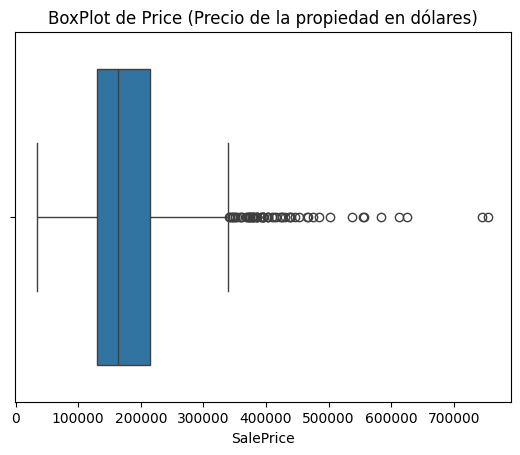

In [13]:
sns.boxplot(x=df_cleaned['SalePrice'])
plt.title('BoxPlot de Price (Precio de la propiedad en dólares)')
plt.show()

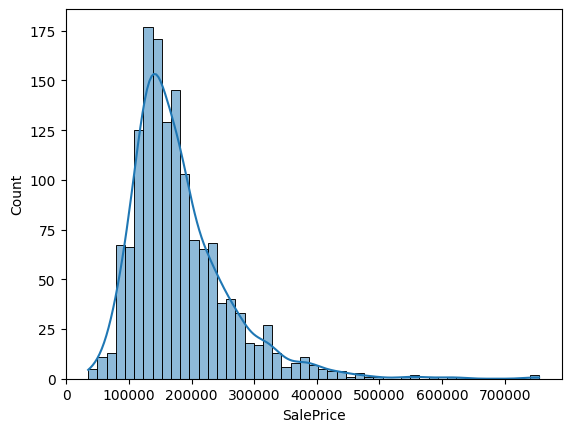

In [14]:
#kde dibuja una curva suave alrededor del histograma
sns.histplot(df_cleaned['SalePrice'], kde=True)
plt.show()

La distribución de SalePrice está sesgada a la derecha, es decir tiene asimetría positiva. Esto sucede porque la media es superior a la mediana. En definitiva, existen viviendas con un precio de venta muchísimo más altos que el promedio (outliers).

### 3.2. Entendimiento de variables

In [15]:
num_cols = df_cleaned.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()
target = 'SalePrice'

#### 3.2.1. Variables Numéricas

In [16]:
print(df_cleaned[num_cols].describe().T)

                count           mean           std      min        25%  \
LotFrontage    1460.0      70.199658     22.431902     21.0      60.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1460.0     102.469178    180.533794      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466  

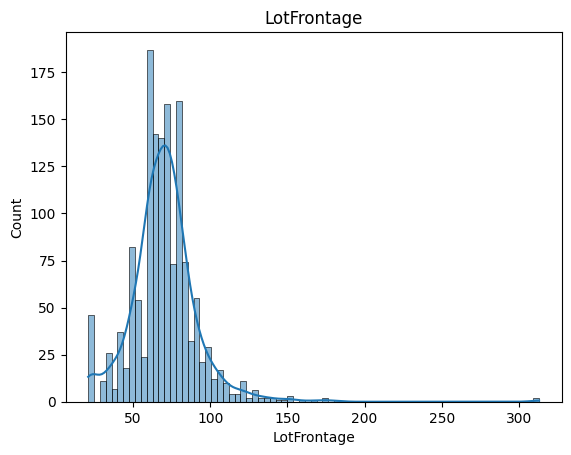

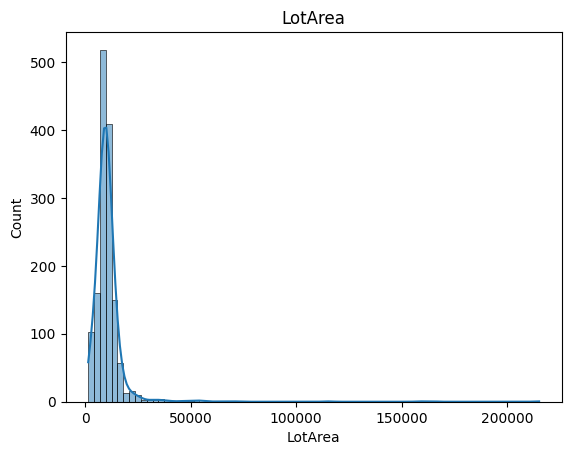

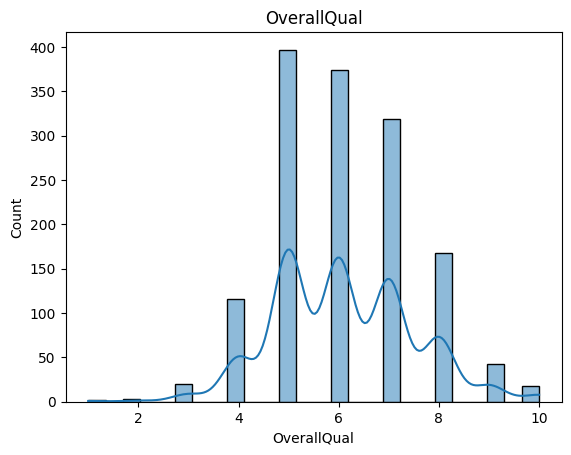

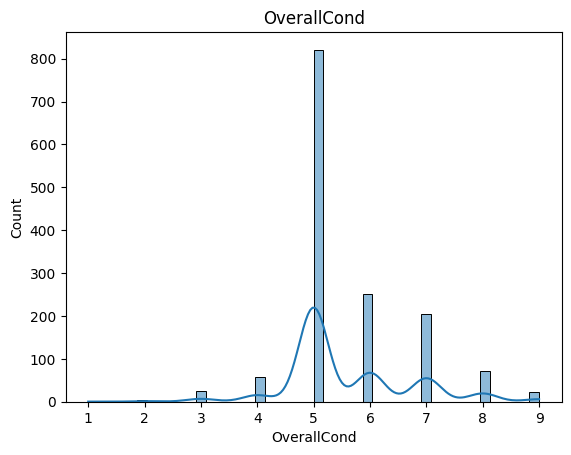

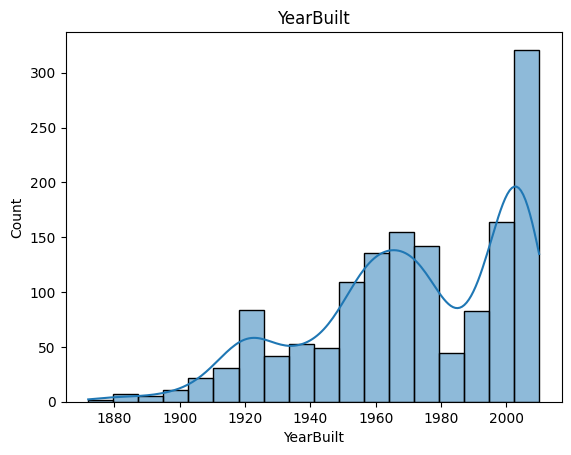

In [17]:
for col in num_cols[0:5]:
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(col)
    plt.show()

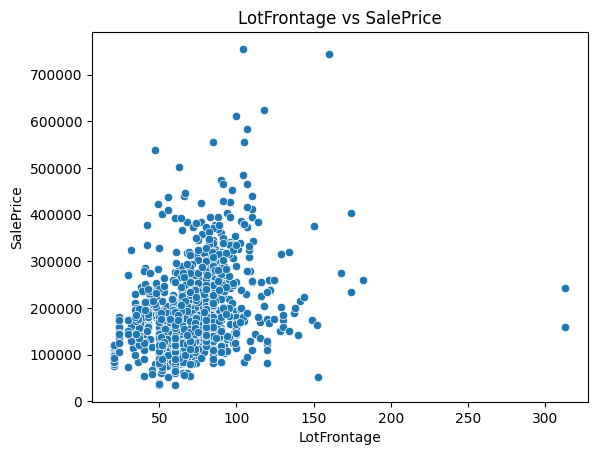

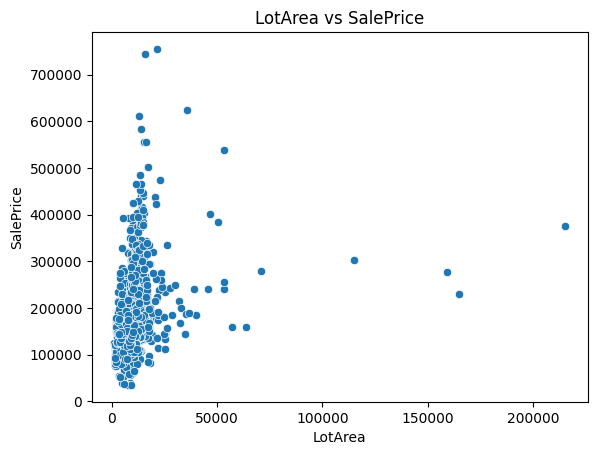

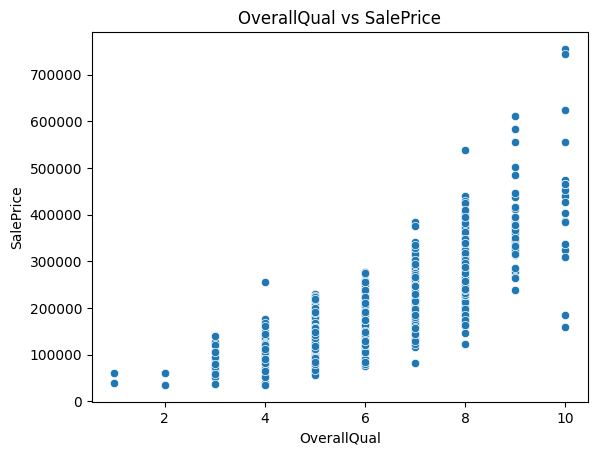

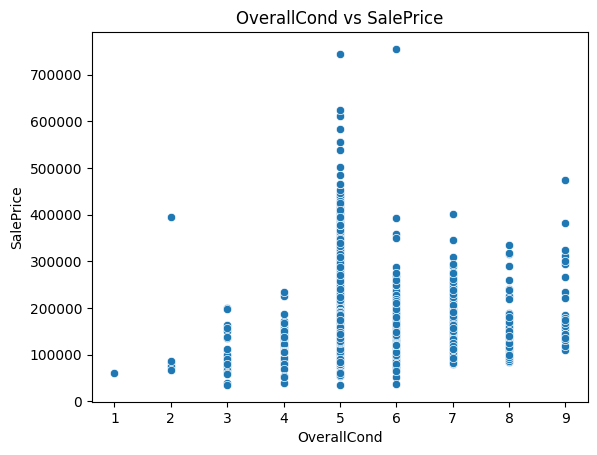

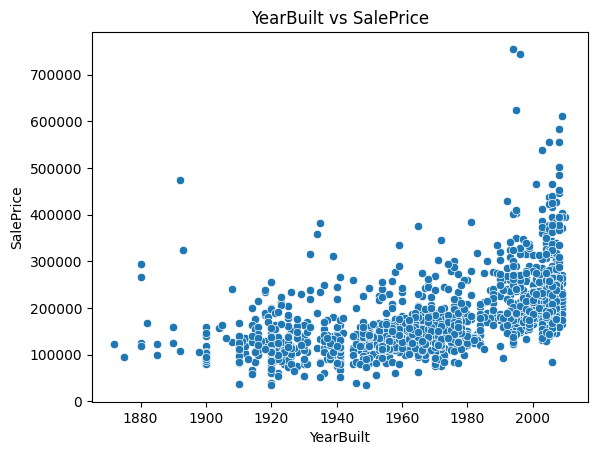

In [18]:
for col in num_cols[0:5]:
    if col != target:
        sns.scatterplot(x=df_cleaned[col], y=df_cleaned[target])
        plt.title(f"{col} vs {target}")
        plt.show()

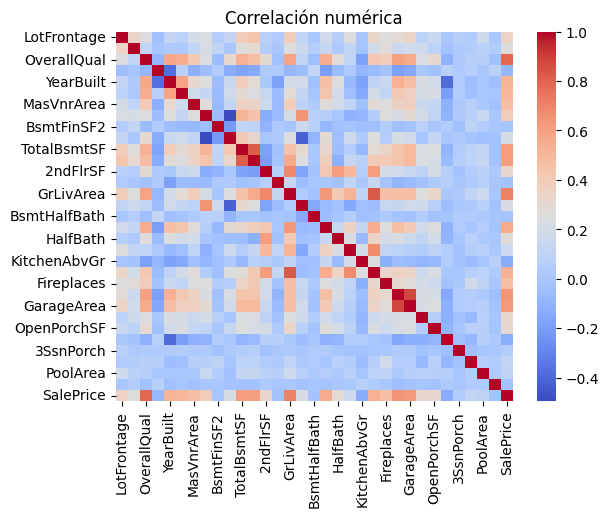

In [19]:
corr = df_cleaned[num_cols].corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlación numérica")
plt.show()

**Observaciones:**

Se observa una correlación marcada de la variable objetivo con las variables:
1. OverallQual
2. GrLivArea
3. GarageArea
4. TotalBsmtSF

#### 3.2.2. Variables Categóricas

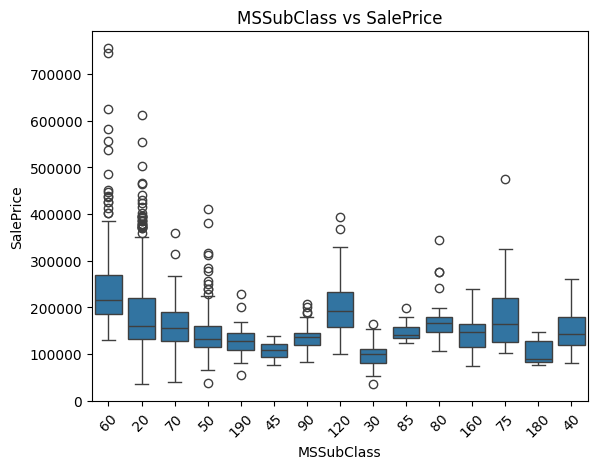

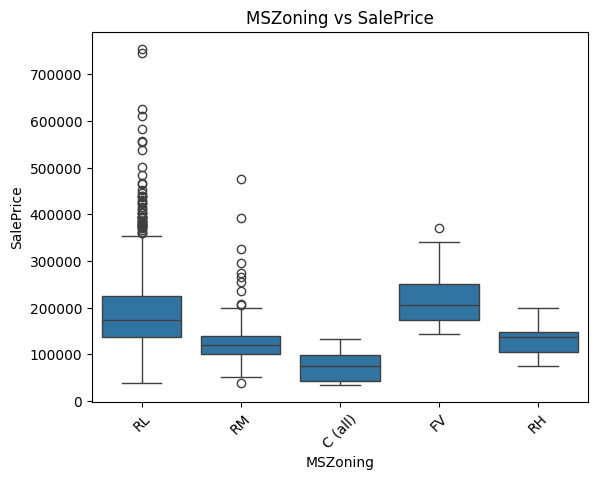

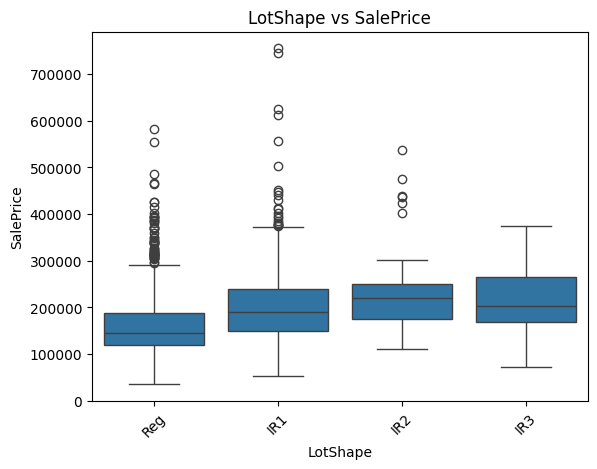

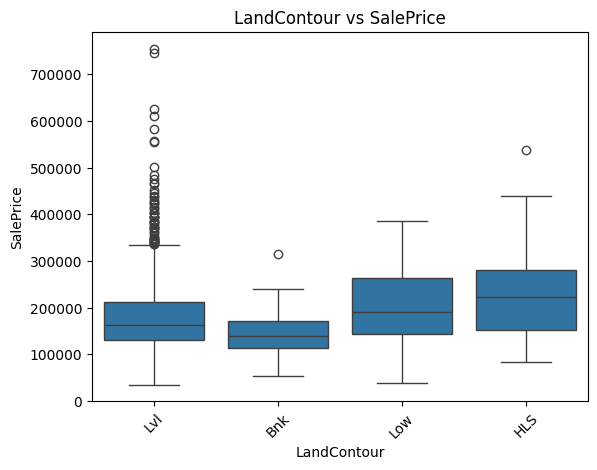

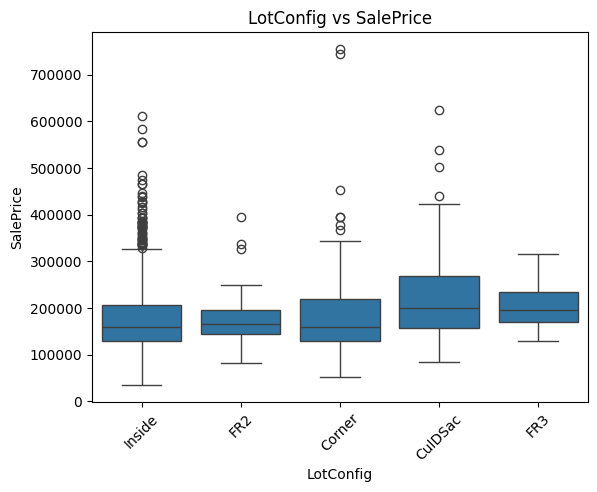

In [20]:
for col in cat_cols[:5]: 
    sns.boxplot(x=df_cleaned[col], y=df_cleaned[target])
    plt.xticks(rotation=45)
    plt.title(f"{col} vs {target}")
    plt.show()

## 3. Ingeniería de Características

Se realizará la ingeniería de características considerando principalmente las siguientes acciones:

1. Codificación de variables categóricas para que puedan ser utilizadas por el modelo.
2. Transformaciones de variables numéricas o categóricas con el fin de mejorar su representatividad o facilitar su análisis.

> Objetivo: Obtener un conjunto de datos preparado y optimizado, listo para el modelado y análisis predictivo.

> Metodología: Cada integrante aplicó las codificaciones y transformaciones necesarias en sus notebooks individuales, los cuales sirven como evidencia del trabajo realizado. Posteriormente, se integraron todas las modificaciones en el notebook principal para consolidar un dataset uniforme y listo para las siguientes fases del proyecto.

### 3.1. Corregir asimetría de la variable objetivo

In [21]:
df_cleaned['SalePrice'] = np.log1p(df_cleaned['SalePrice'])

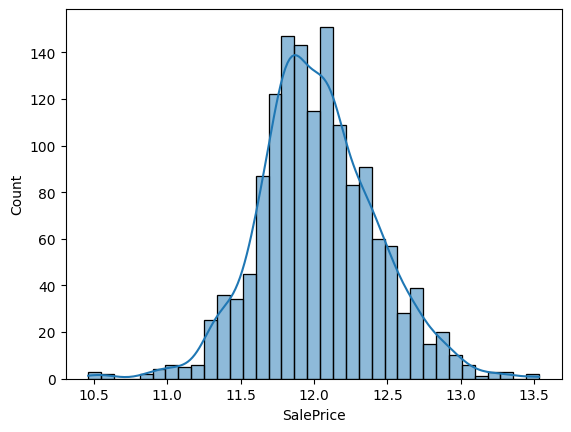

In [22]:
sns.histplot(df_cleaned['SalePrice'], kde=True)
plt.show()

### 3.2. Ingeniería de Características: Ubicación, Lote y Zonificación
> Encargado: Gabriel Tumbaco

In [23]:
df_cleaned = feature_engineering_gabriel_data(df_cleaned)


Tamaño del dataset antes de ingeniería de características (Gabriel): (1460, 76)
-> 'LandSlope' codificada de forma ordinal (Gtl=1, Mod=2, Sev=3).
-> One-Hot Encoding aplicado a columnas nominales: ['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle']
Tamaño final tras ingeniería de características (Gabriel): (1460, 138)


### 3.3. Ingeniería de Características: Estructura, Exterior y Calidad
> Encargado: Angie Alfonso

In [24]:
df_cleaned = feature_engineering_angie_data(df_cleaned)


Tamaño del dataset antes de ingeniería de características (Angie): (1460, 138)
-> One-Hot Encoding aplicado a columnas: ['RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'CentralAir']
-> ExterQual recodificada como ordinal (1–5).
-> ExterCond recodificada como ordinal (1–5).
-> HeatingQC recodificada como ordinal (1–5).
Tamaño final tras ingeniería de características (Angie): (1460, 174)


### 3.4. Ingeniería de Características: Amenities, Interiores y Venta
> Encargado: Yadira Suarez

In [25]:
df_cleaned = feature_engineering_yadira_data(df_cleaned)


Tamaño del dataset antes de ingeniería de características (Yadira): (1460, 174)
-> Variables de sótano codificadas (ordinal).
-> Variables de interiores codificadas (ordinal).
-> Variable de chimenea codificada (ordinal).
-> Variables de garaje y pavimentación codificadas (ordinal).
-> Variables de extras codificadas (ordinal).
-> Categorías raras en 'SaleType' y 'SaleCondition' agrupadas.
-> One-Hot Encoding aplicado a: ['SaleType', 'SaleCondition']
Tamaño final tras ingeniería de características (Yadira): (1460, 179)


In [26]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 179 entries, LotFrontage to SaleCondition_Partial
dtypes: Int64(17), bool(42), float64(3), int64(111), object(6)
memory usage: 1.6+ MB


### 3.5. Guardar data procesada 

In [27]:
processed_path = data_processed_dir() / "train_processed.csv"
df_cleaned.to_csv(processed_path, index=False)

## 4. Modelo de Regresión Lineal Simple

### 4.1. Cargar dataset procesado

In [28]:
df_processed = pd.read_csv(processed_path, dtype={'MSSubClass': str})
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 179 entries, LotFrontage to SaleCondition_Partial
dtypes: Int64(17), bool(42), float64(3), int64(111), object(6)
memory usage: 1.6+ MB


### 4.2. Análisis de correlación

Luego del análisis que cada integrante hizo en sus notebooks personales, se obtuvo que las variables que tienen una mayor correlación con el precio de venta de la vivienda fueron:

1. OverallQual
2. GrLivArea

Por ello, se intentará realizar un modelo de regresión lineal simple para cada variable y observar las métricas clave.

In [29]:
# Importaciones
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### 4.3. Modelo de regresión lineal simple: GrLivArea

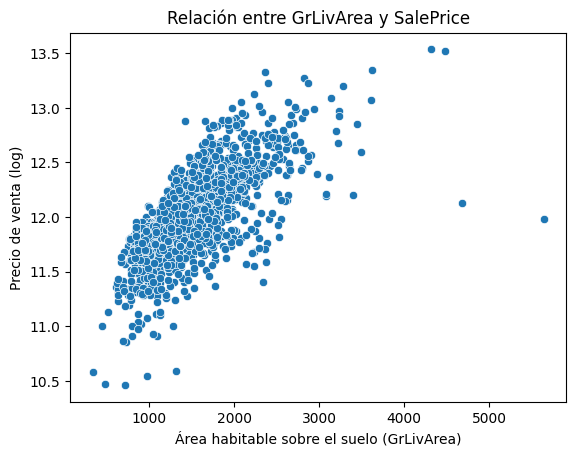

In [30]:
# Variable objetivo
y = df_cleaned['SalePrice']  # se aplicó previamente transformación logarítmica

# Variable predictora
X = df_cleaned[['GrLivArea']] #selección como dataframe

# Visualización inicial
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_cleaned)
plt.title("Relación entre GrLivArea y SalePrice")
plt.xlabel("Área habitable sobre el suelo (GrLivArea)")
plt.ylabel("Precio de venta (log)")
plt.show()

In [33]:
# Creación del modelo
model = LinearRegression()

# Entrenamiento del modelo
model.fit(X, y)

# Predicciones
y_pred = model.predict(X)

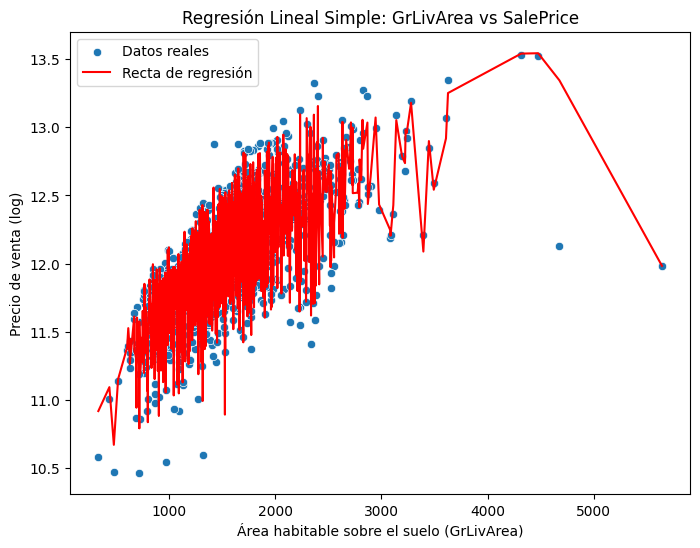

In [43]:
# Ordenar los índices por GrLivArea
sorted_indices = df_cleaned['GrLivArea'].argsort()

# Graficar la recta ordenada
plt.figure(figsize=(8,6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_cleaned, label="Datos reales")
plt.plot(df_cleaned['GrLivArea'].iloc[sorted_indices], y_pred[sorted_indices], color='red', label='Recta de regresión')
plt.title("Regresión Lineal Simple: GrLivArea vs SalePrice")
plt.xlabel("Área habitable sobre el suelo (GrLivArea)")
plt.ylabel("Precio de venta (log)")
plt.legend()
plt.show()

In [35]:
# Coeficientes
b0 = model.intercept_     # B0
b1 = model.coef_[0]       # B1

# Métricas de rendimiento
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print(f"B0 (intercepto): {b0:.4f}")
print(f"B1 (pendiente):  {b1:.4f}")
print(f"RMSE:            {rmse:.4f}")
print(f"R cuadrado:      {r2:.4f}")

B0 (intercepto): 3.1054
B1 (pendiente):  0.0002
RMSE:            0.0971
R cuadrado:      0.9408


#### 4.3.1. Análisis del Modelo

El modelo con GrLivArea como variable predictora obtuvo los siguientes resultados:

- B0 (intercepto): 3.1054  
- B1 (pendiente): 0.0002  
- RMSE: 0.0971  
- R cuadrado: 0.9408  

El valor positivo de B1 confirma que, a mayor área habitable, mayor precio de venta.  
El alto R cuadrado (0.9408) indica que el modelo explica gran parte de la variabilidad del precio, y el RMSE bajo refleja un error promedio pequeño.  

En este caso no se dividieron los datos en entrenamiento y prueba para simplificar el análisis y visualizar la relación directa entre ambas variables.  
Esto puede haber inflado ligeramente el R cuadrado, ya que el modelo se evaluó sobre los mismos datos usados para entrenarlo.

### 4.4. Modelo de regresión lineal simple: OverallQual

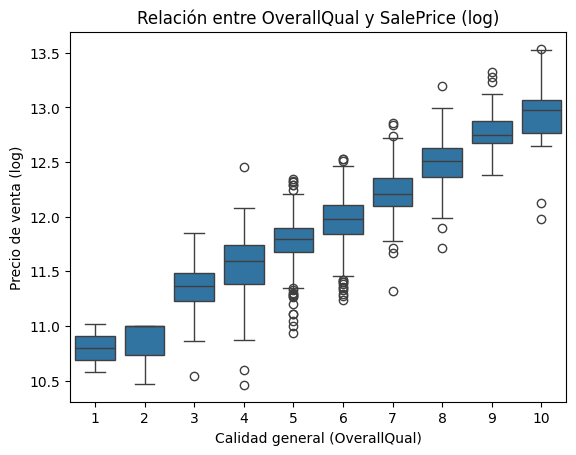

In [36]:
sns.boxplot(x='OverallQual', y='SalePrice', data=df_cleaned)
plt.title("Relación entre OverallQual y SalePrice (log)")
plt.xlabel("Calidad general (OverallQual)")
plt.ylabel("Precio de venta (log)")
plt.show()

In [37]:
# Variable independiente y dependiente
X = df_cleaned[['OverallQual']]
y = df_cleaned['SalePrice']

# Crear y entrenar modelo
model_qual = LinearRegression()
model_qual.fit(X, y)

# Predicciones
y_pred_qual = model_qual.predict(X)

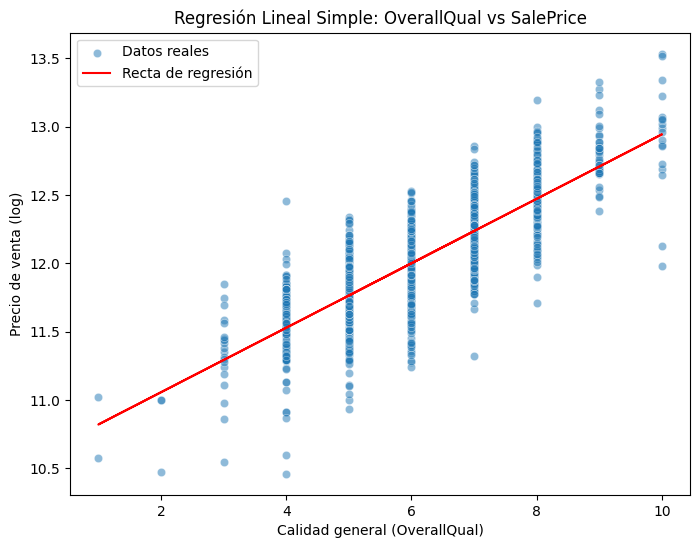

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='OverallQual', y='SalePrice', data=df_cleaned, alpha=0.5, label='Datos reales')
plt.plot(df_cleaned['OverallQual'], y_pred_qual, color='red', label='Recta de regresión')
plt.title("Regresión Lineal Simple: OverallQual vs SalePrice")
plt.xlabel("Calidad general (OverallQual)")
plt.ylabel("Precio de venta (log)")
plt.legend()
plt.show()


In [ ]:
#Métricas clave
b0 = model_qual.intercept_
b1 = model_qual.coef_[0]

rmse = np.sqrt(mean_squared_error(y, y_pred_qual))
r2 = r2_score(y, y_pred_qual)

print(f"B0 (intercepto): {b0:.4f}")
print(f"B1 (pendiente):  {b1:.4f}")
print(f"RMSE:            {rmse:.4f}")
print(f"R cuadrado:      {r2:.4f}")

B0 (intercepto): 10.5845
B1 (pendiente):  0.2360
RMSE:            0.2302
R cuadrado:      0.6678


#### 4.4.1 Análisis del Modelo

El modelo con OverallQual (calidad general de la vivienda) como variable predictora obtuvo los siguientes resultados:

- B0 (intercepto): 10.5845  
- B1 (pendiente): 0.2360  
- RMSE: 0.2302  
- R cuadrado: 0.6678  

El valor positivo de B1 indica que, a mayor calidad general, mayor precio de venta.  
El R cuadrado (0.6678) muestra que el modelo explica alrededor del 67 % de la variabilidad del precio, lo que evidencia una relación significativa pero con mayor dispersión que el modelo basado en `GrLivArea`.  
El RMSE moderado refleja un error aceptable en las predicciones.  

En este caso no se dividieron los datos en entrenamiento y prueba para simplificar el análisis, lo que puede haber inflado ligeramente el R cuadrado.

## 5. Modelo de Regresión Lineal Múltiple

### 5.1. Preparación del dataset

In [44]:
# Usamos el dataset ya limpio y procesado
df = df_cleaned.copy()

# Separar la variable objetivo
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

# Validar que todas las variables sean numéricas
X = pd.get_dummies(X, drop_first=True, dtype=int)

print(f"Dimensiones del conjunto de datos: {X.shape}")

Dimensiones del conjunto de datos: (1460, 300)


### 5.2. Entrenamiento y Evaluación del Modelo 

In [45]:
# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


- El RMSE mide el error promedio, y R cuadrado indica el porcentaje de variabilidad del precio explicado por el modelo.

In [46]:
# Predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Cálculo de métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R cuadrado: {r2:.4f}")

RMSE: 0.20
R cuadrado: 0.7959


In [47]:
# Coeficientes del modelo
coefs = pd.Series(model.coef_, index=X.columns)
coefs_sorted = coefs.sort_values(ascending=False)

print("Variables que aumentan más el precio:")
print(coefs_sorted.head(10))
print("\nVariables que lo reducen más:")
print(coefs_sorted.tail(10))

Variables que aumentan más el precio:
RoofMatl_WdShngl    2.609079
RoofMatl_WdShake    2.517224
RoofMatl_CompShg    2.487826
RoofMatl_Roll       2.468139
RoofMatl_Tar&Grv    2.422035
RoofMatl_Metal      2.409354
MSZoning_FV         0.293839
MSZoning_RL         0.265949
MSZoning_RH         0.262886
Heating_Wall        0.236994
dtype: float64

Variables que lo reducen más:
GarageYrBlt_1965.0    -0.130757
GarageYrBlt_1982.0    -0.131018
RoofStyle_Hip         -0.133432
RoofStyle_Gable       -0.139109
GarageYrBlt_1918.0    -0.144082
RoofStyle_Gambrel     -0.148432
GarageYrBlt_1938.0    -0.168544
GarageYrBlt_1924.0    -0.181868
Exterior1st_BrkComm   -0.232917
GarageYrBlt_1900.0    -0.242510
dtype: float64


### 5.3. Conclusión para el modelo de Regresión Lineal Múltiple

El modelo de regresión lineal múltiple, que incluye todas las variables numéricas y categóricas codificadas, obtuvo:

- RMSE: 0.20  
- R cuadrado: 0.7959  

Esto indica que el modelo explica cerca del 80 % de la variabilidad del precio de las viviendas, con un error promedio bajo.  
Los resultados mejoran respecto a las regresiones lineales simples, ya que ahora se consideran simultáneamente varios factores (tamaño, calidad, materiales, ubicación, etc.).

Las variables más influyentes en el incremento del precio fueron principalmente materiales de techo (`RoofMatl_WdShngl`, `RoofMatl_WdShake`, `RoofMatl_CompShg`) y zonas residenciales (`MSZoning_RL`, `MSZoning_FV`).  
Por otro lado, ciertas combinaciones de año de garaje y estilo de techo mostraron impacto negativo.

En resumen, este modelo logra un buen equilibrio entre complejidad y capacidad predictiva, sirviendo como base de comparación para métodos más avanzados como Ridge, Lasso o Random Forest.

## 6. Modelos Avanzados

### 6.1. Importaciones

In [50]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

### 6.2. Entrenamiento y comparación de modelos avanzados

In [49]:
models = {
    "Linear": LinearRegression(), # Se incluye otra vez para hacer comparaciones
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.001),
    "DecisionTree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append((name, rmse, r2))

df_results = pd.DataFrame(results, columns=["Modelo", "RMSE", "R²"])
print(df_results.sort_values("RMSE"))


         Modelo      RMSE        R²
1         Ridge  0.133922  0.903891
2         Lasso  0.140464  0.894271
4  RandomForest  0.145114  0.887156
0        Linear  0.195179  0.795860
3  DecisionTree  0.197061  0.791904


### 6.3. Visualización comparativa

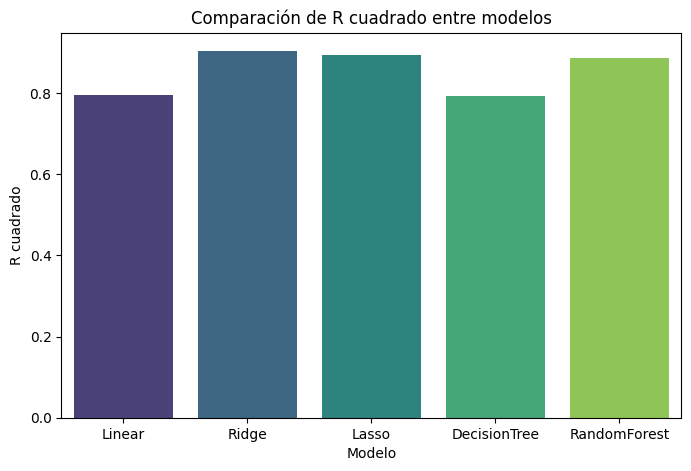

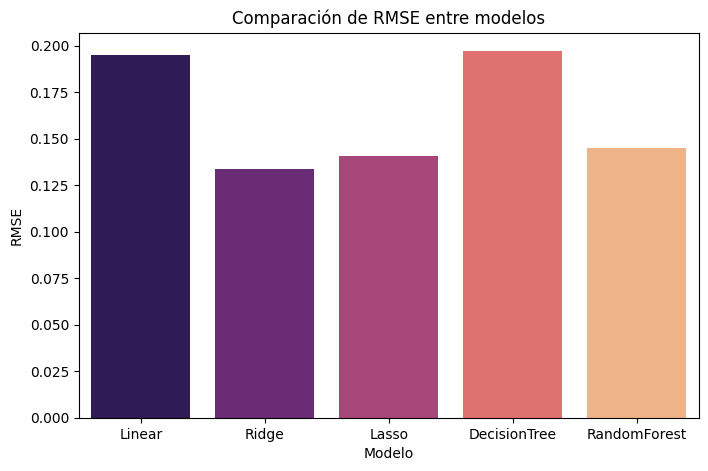

In [54]:
# Gráfico de comparación de modelos
plt.figure(figsize=(8,5))
sns.barplot(x='Modelo', y='R²', hue='Modelo', data=df_results, palette='viridis', legend=False)
plt.title("Comparación de R cuadrado entre modelos")
plt.ylabel("R cuadrado")
plt.xlabel("Modelo")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='Modelo', y='RMSE', hue='Modelo', data=df_results, palette='magma', legend=False)
plt.title("Comparación de RMSE entre modelos")
plt.ylabel("RMSE")
plt.xlabel("Modelo")
plt.show()


### 6.4. Conclusión sobre los modelos avanzados

Se entrenaron y evaluaron cinco modelos diferentes para predecir el precio de las viviendas utilizando el mismo conjunto de datos:

| Modelo | RMSE | R cuadrado |
|:--------|:------|:-----------|
| Ridge | 0.1339 | 0.9039 |
| Lasso | 0.1405 | 0.8943 |
| Random Forest | 0.1451 | 0.8872 |
| Linear | 0.1952 | 0.7959 |
| Decision Tree | 0.1971 | 0.7919 |

Los resultados muestran que los modelos Ridge y Lasso ofrecen el mejor desempeño general, con R cuadrado superiores al 0.89 y errores (RMSE) menores a 0.14.  
Estos modelos logran mejorar significativamente el rendimiento del modelo lineal clásico al aplicar regularización, lo que reduce el sobreajuste y mejora la capacidad de generalización.  

El modelo Random Forest también presenta un buen desempeño, ligeramente inferior pero más robusto frente a datos no lineales.  
Por otro lado, los modelos Lineal y Decision Tree presentan un rendimiento más bajo, lo que confirma que las técnicas de regularización y ensamble aportan una mejora real en la predicción.  

En conjunto, los resultados evidencian que Ridge ofrece el mejor equilibrio entre precisión y estabilidad, siendo una buena elección como modelo final para la predicción de precios.

## 7. Conclusión del Proyecto: Predicción de Precios de Viviendas

A lo largo del proyecto de Predicción de Precios de Viviendas, se aplicó paso a paso el proceso completo de análisis de datos y modelado predictivo.

Primero, se realizó una limpieza exhaustiva del dataset de Ames Housing, corrigiendo valores nulos, eliminando columnas irrelevantes y normalizando los tipos de datos.  
Luego, en la fase de análisis exploratorio, se identificaron las variables más relacionadas con el precio, destacando GrLivArea y OverallQual.  

Después se desarrollaron modelos de regresión lineal simple, que permitieron entender cómo cada variable influye directamente en el precio.  
Posteriormente, se implementó un modelo de regresión lineal múltiple y otros más avanzados como Ridge, Lasso y Random Forest, mejorando el rendimiento y la capacidad de predicción. 

El proyecto permitió practicar todo el flujo de trabajo de un modelo de machine learning, desde la preparación de datos hasta la evaluación con métricas como RMSE y R².  
Además, se reforzaron conocimientos de estadística, visualización y programación con Python, así como la importancia de la limpieza y transformación de los datos antes del modelado.

En resumen, se logró construir un modelo funcional y comprensible que predice el precio de una vivienda con buena precisión, aplicando técnicas reales usadas en ciencia de datos.
